<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  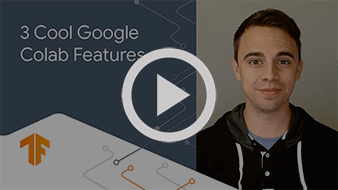
  </a>
</center>

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 46ms/step


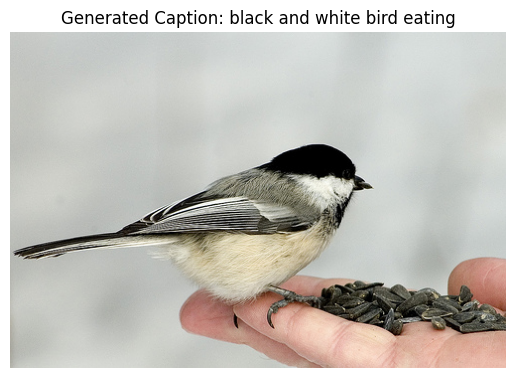

1/1 [==============================] - 0s 27ms/step


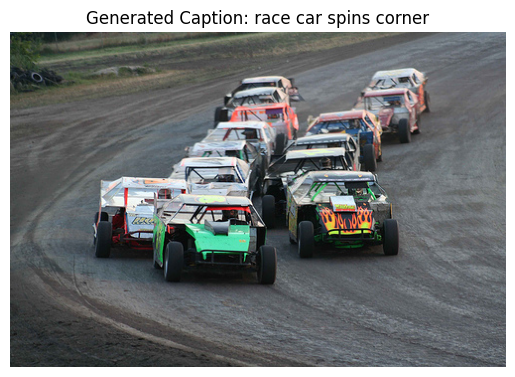

1/1 [==============================] - 0s 27ms/step


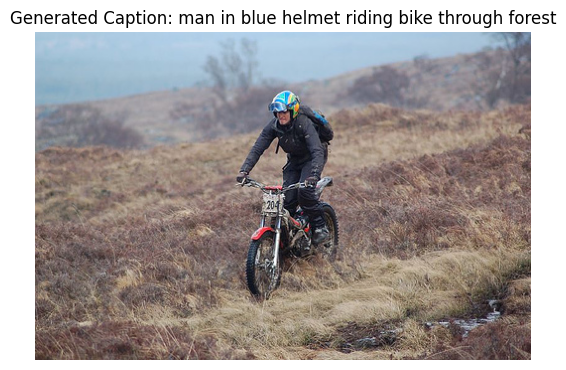

1/1 [==============================] - 0s 27ms/step


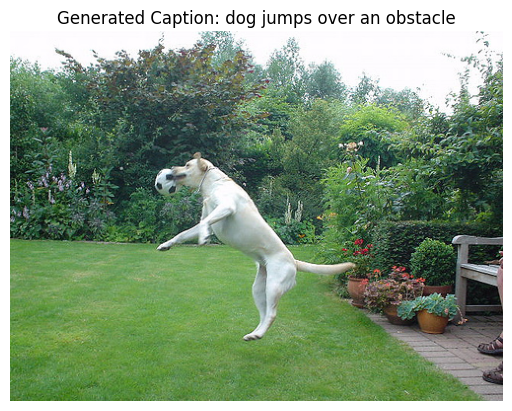

In [ ]:
import numpy as np
import pickle
import os
from PIL import Image
from keras.models import Model, load_model
from keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.sequence import pad_sequences
from keras.applications.resnet50 import ResNet50, preprocess_input
import matplotlib.pyplot as plt

# Assuming these variables are defined somewhere in your script\
# Adjust paths as needed
MODEL_PATH = "/content/drive/MyDrive/model_weights_25.h5"
WORD_TO_IDX_PATH = "/content/drive/MyDrive/word_to_idx.pkl"
IDX_TO_WORD_PATH = "/content/drive/MyDrive/idx_to_word.pkl"

# Load model and setup ResNet50
model = load_model(MODEL_PATH)
model_resnet = ResNet50(weights='imagenet', input_shape=(224, 224, 3))
model_final = Model(model_resnet.input, model_resnet.layers[-2].output)

# Load word_to_idx and idx_to_word dictionaries
with open(WORD_TO_IDX_PATH, "rb") as w2i:
    word_to_idx = pickle.load(w2i)

with open(IDX_TO_WORD_PATH, "rb") as i2w:
    idx_to_word = pickle.load(i2w)

def preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.convert("RGB")
    img = img.resize((224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def encode_image(img):
    img = preprocess_image(img)
    feature_vector = model_final.predict(img)
    return feature_vector

def predict_caption_using_greedySearch(photo):
    inp_text = 'startseq'
    max_len = 33

    for i in range(max_len):
        sequence = [word_to_idx[word] for word in inp_text.split() if word in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')

        pred_label = model.predict([photo, sequence])
        pred_label = pred_label.argmax()
        pred_word = idx_to_word[pred_label]

        inp_text += " " + pred_word
        if pred_word == "endseq":
            break

    final_caption = inp_text.split(' ')[1:-1]
    final_caption = ' '.join(final_caption)

    return final_caption
def generate_caption(image_path):
    enc = encode_image(image_path)
    caption = predict_caption_using_greedySearch(enc)
    # Display the image with its generated caption
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Generated Caption: {caption}")
    plt.show()
    return caption

# Example usage
image_path = '/content/drive/MyDrive/test/bird.jpg'
caption = generate_caption(image_path)
image_path = '/content/drive/MyDrive/test/cars.jpg'
caption = generate_caption(image_path)
image_path = '/content/drive/MyDrive/test/man_bike.jpg'
caption = generate_caption(image_path)
image_path = '/content/drive/MyDrive/test/whitedog.jpg'
caption = generate_caption(image_path)

1/1 [==============================] - 0s 30ms/step


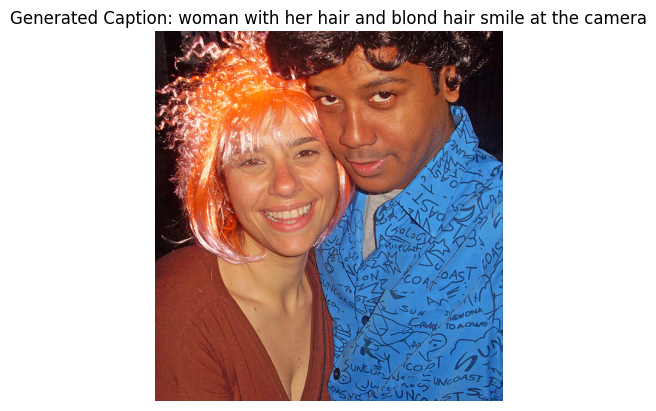

Image: /content/drive/MyDrive/Image/images/3618115051_41b5a7706c.jpg
Generated Caption: woman with her hair and blond hair smile at the camera
Reference Captions: [['couple', 'in', 'funny', 'wigs', 'pose', 'for', 'the', 'camera', '.'], ['couple', 'posing', 'in', 'wigs'], ['man', 'in', 'blue', 'and', 'a', 'woman', 'in', 'brown', ',', 'with', 'orange', 'hair', ',', 'are', 'hugging', '."'], ['young', 'man', 'and', 'woman', 'hug', 'while', 'wearing', 'wigs', '.'], ['woman', 'in', 'the', 'orange', 'wig', 'poses', 'with', 'the', 'man', 'in', 'the', 'black', 'wig', '.']]
BLEU Score: 0.0525

1/1 [==============================] - 0s 40ms/step


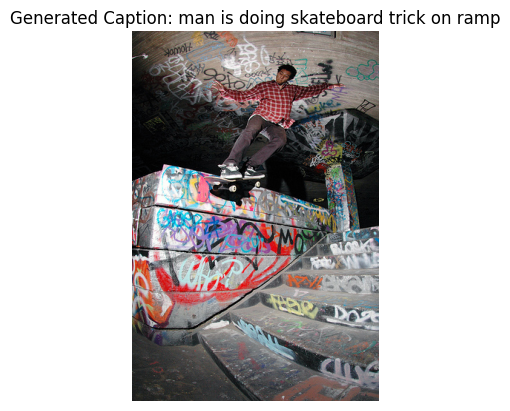

Image: /content/drive/MyDrive/Image/images/3613705104_46d854134e.jpg
Generated Caption: man is doing skateboard trick on ramp
Reference Captions: [['boy', 'skateboards', 'off', 'a', 'ramp', 'covered', 'in', 'graffiti', '.'], ['male', 'skateboarder', 'is', 'skating', 'in', 'a', 'vandalized', 'skate', 'park', '.'], ['man', 'does', 'a', 'jump', 'on', 'a', 'skateboard', ',', 'surrounded', 'by', 'graffiti', '."'], ['man', 'does', 'a', 'skating', 'trick', 'off', 'of', 'graffiti-filled', 'stairs', '.'], ['skateboarder', 'skates', 'down', 'stairs', 'covered', 'in', 'graffiti', '.']]
BLEU Score: 0.0448

1/1 [==============================] - 0s 42ms/step


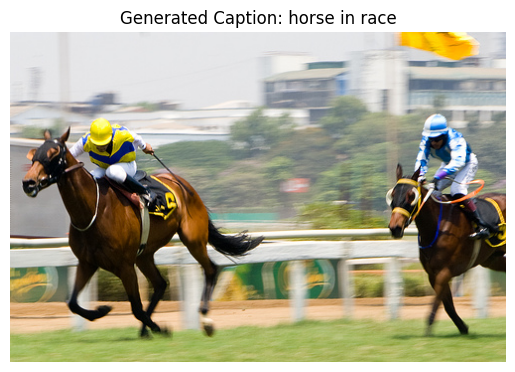

Image: /content/drive/MyDrive/Image/images/3616771728_2c16bf8d85.jpg
Generated Caption: horse in race
Reference Captions: [['jockey', 'in', 'yellow', 'and', 'a', 'jockey', 'in', 'blue', 'are', 'racing', 'their', 'horses', 'down', 'a', 'grassy', 'raceway', '.'], ['jockey', 'wearing', 'a', 'yellow', 'hat', 'edges', 'out', 'the', 'jockey', 'wearing', 'blue', '.'], ['horses', 'with', 'riders', ',', 'race', 'along', 'the', 'track', '."'], ['jockeys', ',', 'one', 'in', 'yellow', ',', 'one', 'in', 'blue', ',', 'riding', 'horses', 'in', 'a', 'race', '."'], ['jockeys', 'race', 'horses']]
BLEU Score: 0.1351

1/1 [==============================] - 0s 44ms/step


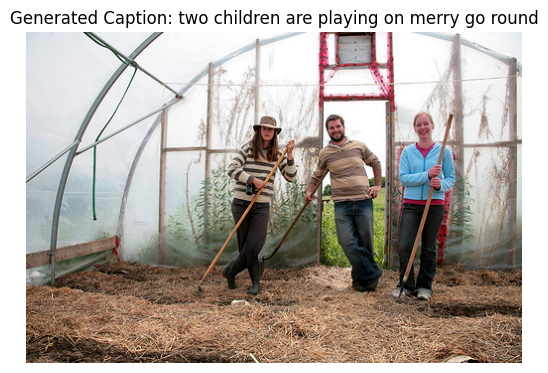

Image: /content/drive/MyDrive/Image/images/3616846215_d61881b60f.jpg
Generated Caption: two children are playing on merry go round
Reference Captions: [['man', 'and', 'two', 'women', 'are', 'inside', 'a', 'greenhouse', 'holding', 'gardening', 'tools', '.'], ['tend', 'a', 'greenhouse', 'with', 'garden', 'tools', '.'], ['people', 'in', 'a', 'green', 'house', '.'], ['young', 'adults', 'work', 'in', 'a', 'greenhouse'], ['women', 'and', 'a', 'man', 'smile', 'at', 'the', 'camera', 'with', 'rakes', 'in', 'their', 'hands', 'standing', 'in', 'an', 'unfinished', 'greenhouse', '.']]
BLEU Score: 0.0330

1/1 [==============================] - 0s 31ms/step


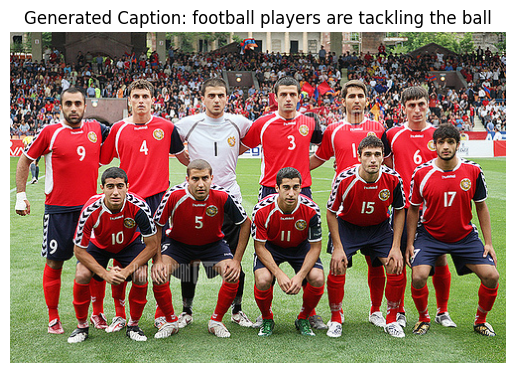

Image: /content/drive/MyDrive/Image/images/3613955682_3860e116cf.jpg
Generated Caption: football players are tackling the ball
Reference Captions: [['group', 'of', 'players', 'on', 'a', 'team', 'are', 'posing', 'together', '.'], ['soccer', 'team', 'poses', 'for', 'a', 'picture', '.'], ['soccer', 'team', 'wearing', 'red', 'posing', 'together', '.'], ['sports', 'team', 'poses', 'on', 'the', 'field', '.'], ['team', 'poses', 'on', 'field', 'with', 'crowd', 'in', 'the', 'background', '.']]
BLEU Score: 0.0455



In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def load_descriptions(file_path):
    descriptions = {}
    with open(file_path, 'r') as file:
        for line in file:
            tokens = line.strip().split()
            image_id, image_desc = tokens[0], tokens[1:]
            image_id = image_id.split('.')[0]
            if image_id not in descriptions:
                descriptions[image_id] = []
            descriptions[image_id].append(' '.join(image_desc))
    return descriptions

def evaluate_model(image_paths, ground_truth_captions):
    bleu_scores = []
    smoothing = SmoothingFunction().method1
    for image_path in image_paths:
        image_id = os.path.basename(image_path).split('.')[0]
        generated_caption = generate_caption(image_path)
        reference_captions = ground_truth_captions.get(image_id, [])
        reference_captions = [caption.split() for caption in reference_captions]
        generated_caption_tokens = generated_caption.split()

        if not reference_captions:
            print(f"No reference captions found for image: {image_path}")
            continue

        bleu_score = sentence_bleu(reference_captions, generated_caption_tokens, smoothing_function=smoothing)
        bleu_scores.append(bleu_score)



        print(f"Image: {image_path}")
        print(f"Generated Caption: {' '.join(generated_caption_tokens)}")
        print(f"Reference Captions: {reference_captions}")
        print(f"BLEU Score: {bleu_score:.4f}\n")


# Load descriptions
descriptions = load_descriptions('/content/drive/MyDrive/Image/captions.txt')

# Select 10 images for evaluation
IMAGE_FOLDER_PATH="/content/drive/MyDrive/Image/images"
image_files = [os.path.join(IMAGE_FOLDER_PATH, f) for f in os.listdir(IMAGE_FOLDER_PATH) if f.endswith('.jpg')]
selected_image_files = image_files[490:495]

# Evaluate the model
evaluate_model(selected_image_files, descriptions)

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

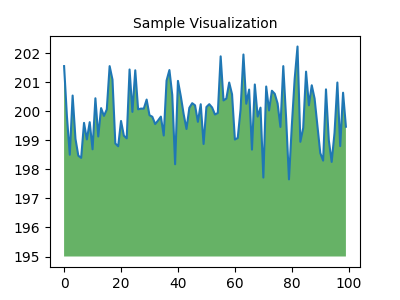

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
